# Electric Vehicle Market Analysis

**Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading data csv files**

In [11]:
df1 = pd.read_csv('Cheapestelectriccars-EVDatabase.csv')
df2 = pd.read_csv('ElectricCarData_Clean.csv')
df3 = pd.read_csv("electric_vehicle_charging_station_list.csv")
df4 = pd.read_csv("RS_Session_252_AU_864.2.iii.csv")

**df1**

In [3]:
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


**df2**

In [4]:
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


#### df3

In [5]:
df3.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


#### df4

In [12]:
df4.head()

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207


## Data pre-processing of df1

#### Shape of df1

In [5]:
df1.shape

(180, 11)

#### Checking for NULL values

In [6]:
df1.isnull().any()

Name               False
Subtitle           False
Acceleration       False
TopSpeed           False
Range              False
Efficiency         False
FastChargeSpeed    False
Drive              False
NumberofSeats      False
PriceinGermany      True
PriceinUK           True
dtype: bool

#### No NULL values present in required columns of df1 <br> Now we drop the columns which are not required in df1

In [22]:
#df1=df1.drop('Subtitle',axis=1)
df1=df1.drop('Drive',axis=1)
df1=df1.drop('PriceinUK',axis=1)
df1=df1.drop('PriceinGermany',axis=1)
df1=df1.drop('FastChargeSpeed',axis=1)
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,NumberofSeats
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,5
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,5
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,5
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,5
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,4


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           180 non-null    object
 1   Subtitle       180 non-null    object
 2   Acceleration   180 non-null    object
 3   TopSpeed       180 non-null    object
 4   Range          180 non-null    object
 5   Efficiency     180 non-null    object
 6   NumberofSeats  180 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 10.0+ KB


#### now we need to convert object datatype to int or float

In [24]:
df1['Acceleration'] = df1['Acceleration'].str.replace('sec','')
df1['Acceleration'] = df1['Acceleration'].astype(float)

df1['TopSpeed'] = df1['TopSpeed'].str.replace('km/h','')
df1['TopSpeed'] = df1['TopSpeed'].astype(int)

df1['Range'] = df1['Range'].str.replace('km','')
df1['Range'] = df1['Range'].astype(int)

df1['Efficiency'] = df1['Efficiency'].str.replace('Wh/km','')
df1['Efficiency'] = df1['Efficiency'].astype(int)

df1['Battery Electric Vehicle'] = df1['Subtitle'].str.replace('Battery Electric Vehicle |','')
df1=df1.drop('Subtitle',axis=1)
df1['Battery Electric Vehicle'] = df1['Battery Electric Vehicle'].str.replace('kWh','')
df1['Battery Electric Vehicle'] = df1['Battery Electric Vehicle'].str.replace('|','')
df1['Battery Electric Vehicle'] = df1['Battery Electric Vehicle'].astype(float)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10888/2507205210.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Battery Electric Vehicle'] = df1['Subtitle'].str.replace('Battery Electric Vehicle |','')
C:\Users\DELL\AppData\Local\Temp/ipykernel_10888/2507205210.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Battery Electric Vehicle'] = df1['Battery Electric Vehicle'].str.replace('|','')


In [25]:
df1.head()

,Name,Acceleration,TopSpeed,Range,Efficiency,NumberofSeats,Battery Electric Vehicle
0,Opel Ampera-e,7.3,150,335,173,5,58.0
1,Renault Kangoo Maxi ZE 33,22.4,130,160,194,5,31.0
2,Nissan Leaf,7.9,144,220,164,5,36.0
3,Audi e-tron Sportback 55 quattro,5.7,200,375,231,5,86.5
4,Porsche Taycan Turbo S,2.8,260,390,215,4,83.7


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      180 non-null    object 
 1   Acceleration              180 non-null    float64
 2   TopSpeed                  180 non-null    int32  
 3   Range                     180 non-null    int32  
 4   Efficiency                180 non-null    int32  
 5   NumberofSeats             180 non-null    int64  
 6   Battery Electric Vehicle  180 non-null    float64
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 7.9+ KB


In [27]:
df1.describe()

,Acceleration,TopSpeed,Range,Efficiency,NumberofSeats,Battery Electric Vehicle
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,7.854444,176.400000,337.388889,194.272222,5.166667,65.263889
std,3.169465,42.096006,118.718078,32.684001,0.971666,24.952074
min,2.100000,123.000000,95.000000,104.000000,2.000000,16.700000
25%,5.575000,150.000000,258.750000,168.000000,5.000000,45.000000
50%,7.500000,160.000000,340.000000,188.500000,5.000000,66.500000
75%,9.625000,200.000000,400.000000,215.250000,5.000000,77.400000
max,22.400000,410.000000,970.000000,281.000000,7.000000,200.000000


In [28]:
df1['Name'].nunique()

174

## Data pre-processing of df2

In [51]:
df2.shape

(103, 14)

In [52]:
df2.isnull().any()

Brand              False
Model              False
AccelSec           False
TopSpeed_KmH       False
Range_Km           False
Efficiency_WhKm    False
FastCharge_KmH     False
RapidCharge        False
PowerTrain         False
PlugType           False
BodyStyle          False
Segment            False
Seats              False
PriceEuro          False
dtype: bool

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [54]:
df2.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


### Data Pre-processing of df3

In [7]:
df3.shape

(202, 9)

In [8]:
df3["region"].value_counts()

NDMC               74
Noida Authority    53
SDMC               31
CMRL               16
NKDA               16
ANERT               6
NRANVP              4
Maha Metro          2
Name: region, dtype: int64

### Data Pre-processing of df4

In [13]:
df4.shape

(25, 2)

In [14]:
df4

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


In [15]:
df4 = df4.iloc[0:24, : ]
df4

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


## Analysis of df1, df2, df3 and df4

### Heatmap of df1

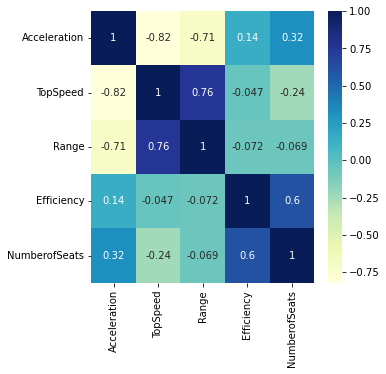

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu")
plt.show()

- #### Range and top-speed are positively correlated.

### Heatmap of df2

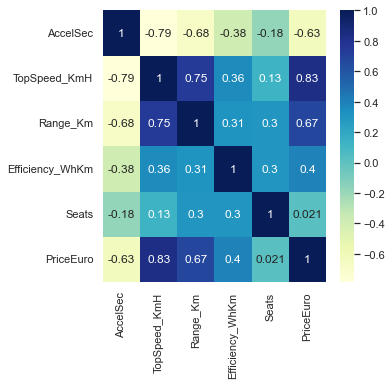

In [55]:
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu")
plt.show()

- #### Range and top-speed, price and top-speed are more positively correlated

### 1. Number of seats

### df1

In [55]:
df1['NumberofSeats'].value_counts()

5    118
7     32
4     28
2      2
Name: NumberofSeats, dtype: int64

Text(0.5, 1.0, 'Seats')

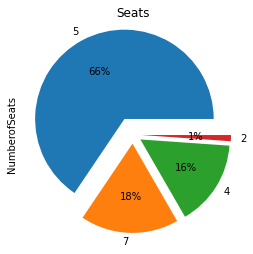

In [60]:
df1['NumberofSeats'].value_counts().plot.pie(figsize=(4,10),autopct='%.0f%%',explode=(0.2,0.1,0.1,0.1))
plt.title('Seats')

### df2

In [56]:
df2['Seats'].value_counts()

5    71
4    21
7     6
6     3
2     2
Name: Seats, dtype: int64

Text(0.5, 1.0, 'Seats')

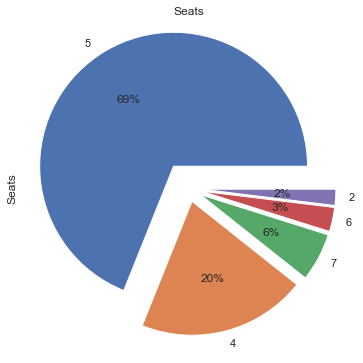

In [58]:
df2['Seats'].value_counts().plot.pie(figsize=(6,12),autopct='%.0f%%',explode=(0.2,0.1,0.1,0.1,0.1))
plt.title('Seats')

- #### 5 seat EV is the most commonly used.

### 2. Acceleration

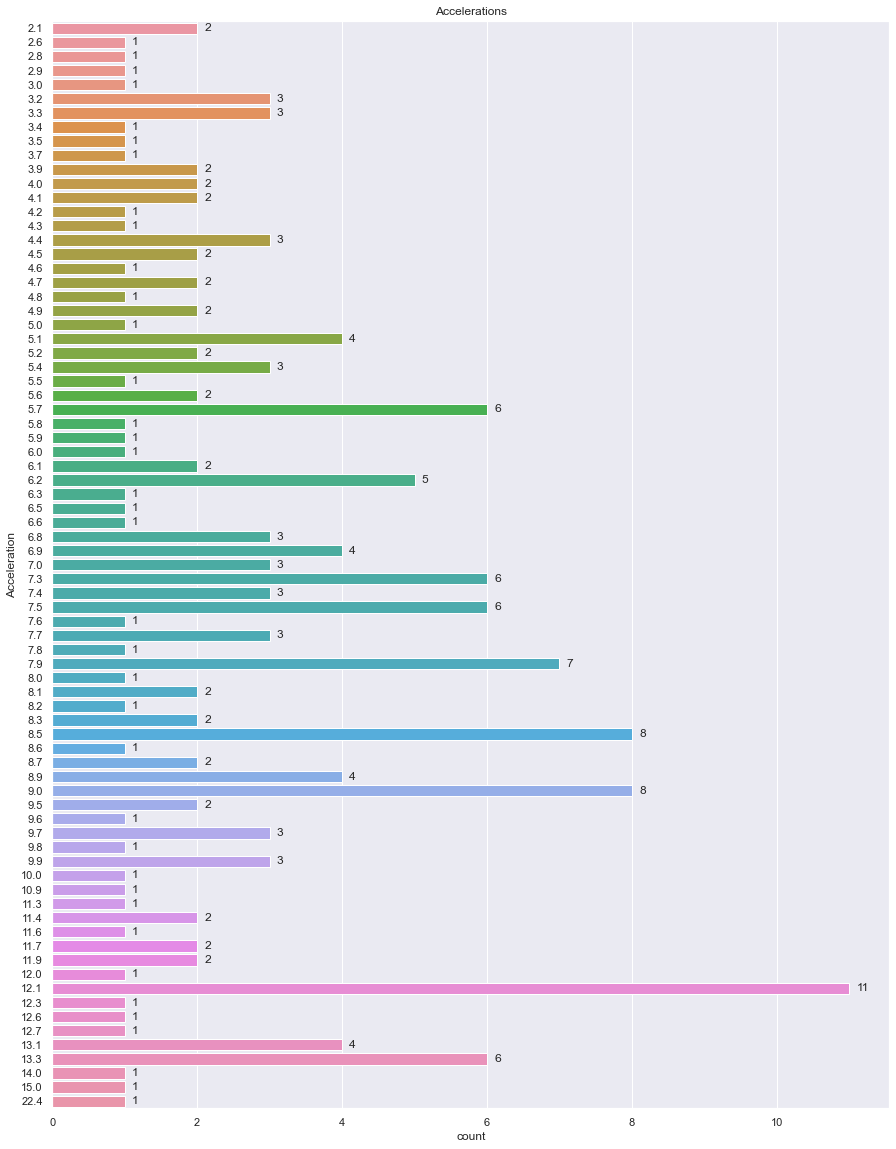

In [22]:
sns.set(rc={'figure.figsize':(15,20)})
ax = sns.countplot(y=df1['Acceleration'], data=df1)
ax.set(title='Accelerations') 

# label each bar in countplot
for p in ax.patches:
    
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (acceleration)

    # adding text to each bar
    ax.text(x = width+0.1, # x-coordinate position of data label, padded 0.1 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center


In [35]:
max_acc=df1.loc[df1['Acceleration'] == 22.4,'Name'].values[0]
print(max_acc)

Renault Kangoo Maxi ZE 33


- #### 12.1 m/sec acceleartion is the most common<br/> Renault Kangoo Maxi ZE 33 has the max acceleration which is 22.4

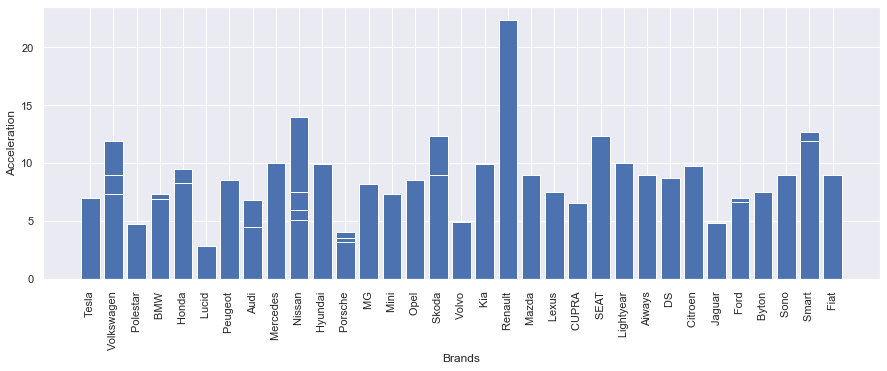

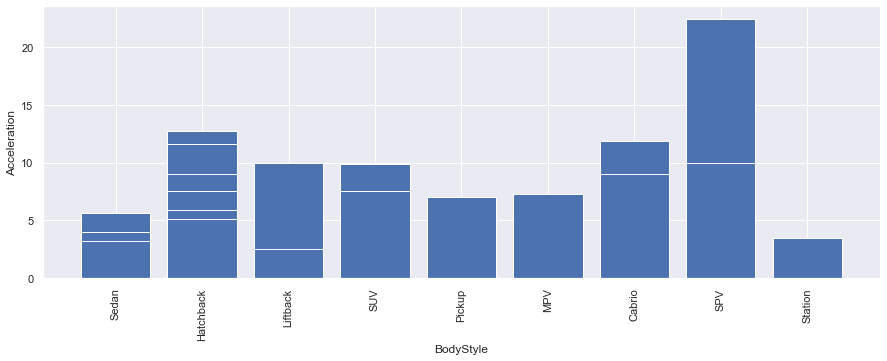

In [77]:
plt.figure(figsize=(15,5))
plt.bar(height=df2['AccelSec'],x = df2['Brand'])
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Acceleration')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(height=df2['AccelSec'],x = df2['BodyStyle'])
plt.xticks(rotation=90)
plt.xlabel('BodyStyle')
plt.ylabel('Acceleration')
plt.show()

- #### Renault brand has highest acceleration <br/> SPV bodystyle has highest acceleration

### 3. Top Speed

[Text(0.5, 1.0, 'TopSpeed')]

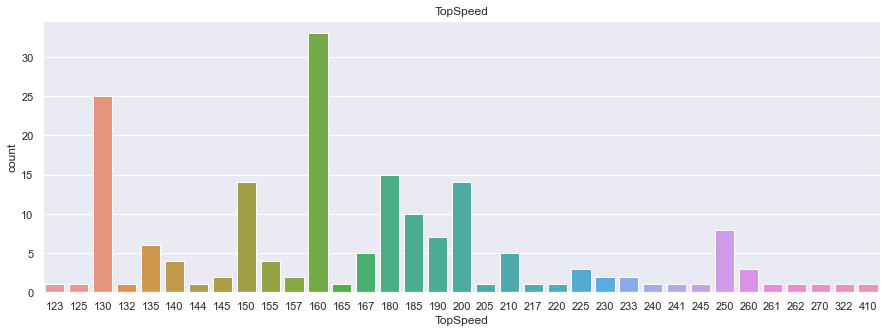

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(x=df1['TopSpeed'], data=df1)
ax.set(title='TopSpeed')

In [39]:
commonspeed=df1.loc[df1['TopSpeed'] == 160,'Name'].values
print(commonspeed)

['Volkswagen ID.3 Pure Performance' 'Mercedes EQA 250' 'BMW i3s 120 Ah'
 'CUPRA Born 110 kW - 55 kWh' 'Audi Q4 e-tron 35' 'Skoda Enyaq iV 50'
 'Volkswagen ID.3 Pro' 'Volkswagen ID.3 Pro S' 'Mercedes EQV 300 Long'
 'Lexus UX 300e' 'Volkswagen ID.4 1st' 'Skoda Enyaq iV 60'
 'Skoda Enyaq iV 80' 'Skoda Enyaq iV 80X' 'Audi Q4 Sportback e-tron 35'
 'Nissan Ariya 63kWh' 'Nissan Ariya 87kWh'
 'Volkswagen ID.3 Pro Performance' 'Volkswagen ID.4 Pro Performance'
 'Mercedes EQV 300 Extra-Long' 'Volkswagen ID.4 Pure Performance'
 'Polestar 2 Standard Range Single Motor'
 'Polestar 2 Long Range Single Motor' 'Volkswagen ID.4 Pure'
 'Audi Q4 e-tron 40' 'Mercedes EQB 350 4MATIC' 'Mercedes EQA 300 4MATIC'
 'Mercedes EQA 350 4MATIC' 'CUPRA Born 150 kW - 62 kWh'
 'CUPRA Born 170 kW - 62 kWh' 'CUPRA Born 170 kW - 82 kWh'
 'Renault Megane E-Tech Electric' 'Audi Q4 Sportback e-tron 40']


In [40]:
topspeed=df1.loc[df1['TopSpeed'] == 410,'Name'].values
print(topspeed)

['Tesla Roadster ']


- #### Tesla Roadster has the max speed of 410 kmph

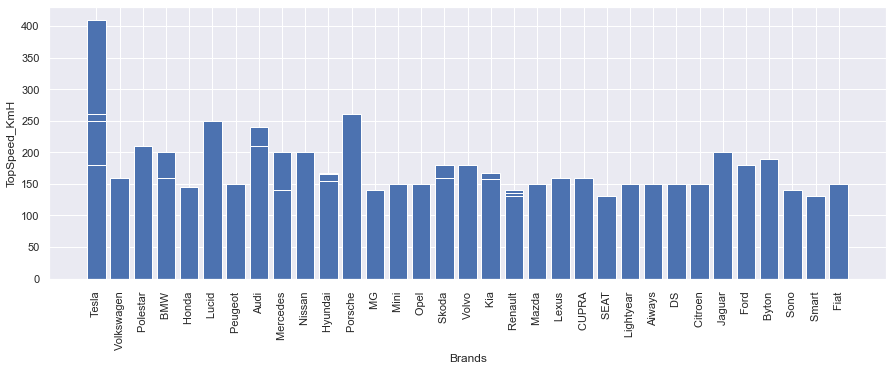

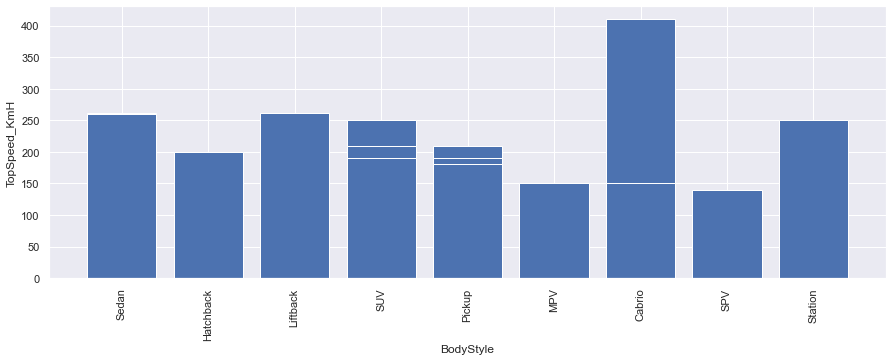

In [79]:
plt.figure(figsize=(15,5))
plt.bar(height=df2['TopSpeed_KmH'],x = df2['Brand'])
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('TopSpeed_KmH')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(height=df2['TopSpeed_KmH'],x = df2['BodyStyle'])
plt.xticks(rotation=90)
plt.xlabel('BodyStyle')
plt.ylabel('TopSpeed_KmH')
plt.show()

- #### Tesla Brand EVs have the top-most speed <br/>Cabrio BodyStyle EVs have top speeds

### 4. Range

[Text(0.5, 1.0, 'Range')]

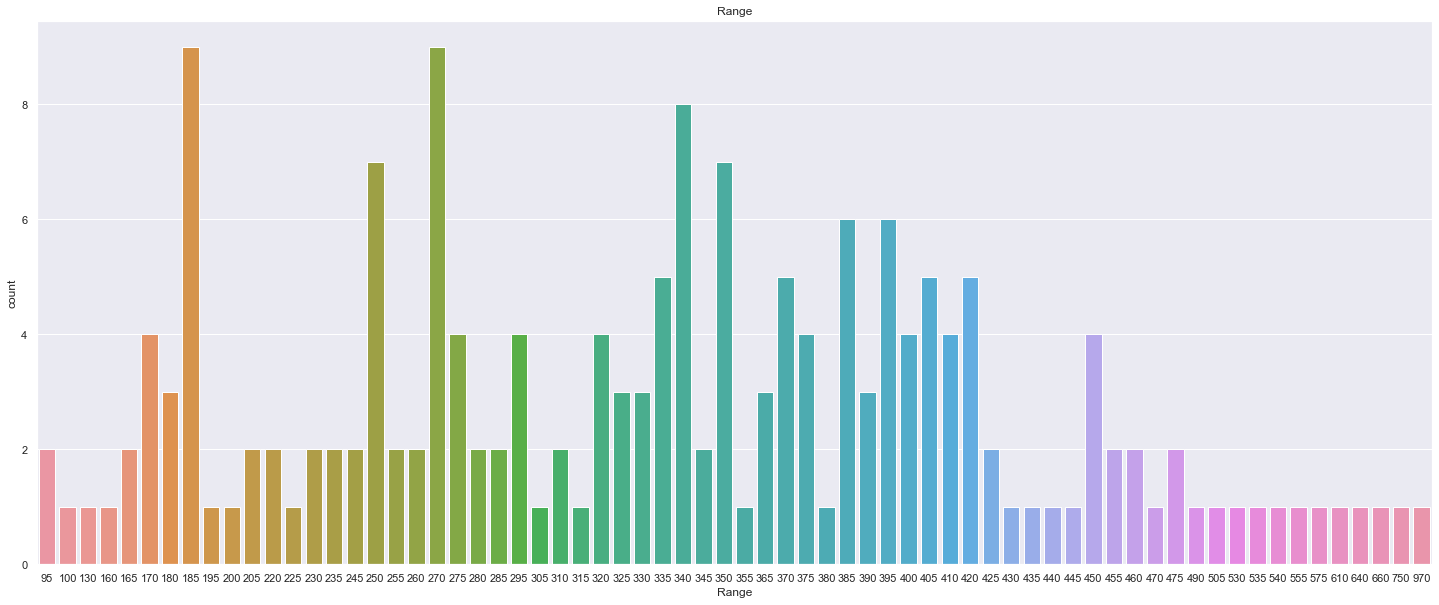

In [43]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.countplot(x=df1['Range'], data=df1)
ax.set(title='Range')

In [45]:
max_range=df1.loc[df1['Range'] == 970,'Name'].values
print(max_range)

['Tesla Roadster ']


- #### Tesla Roadster has the max range

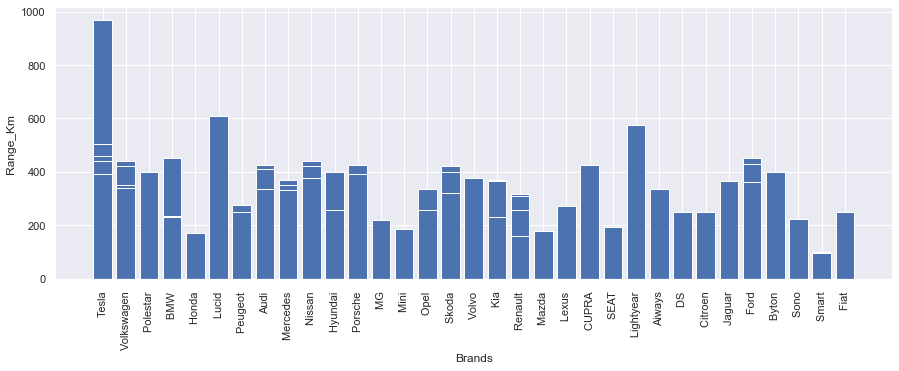

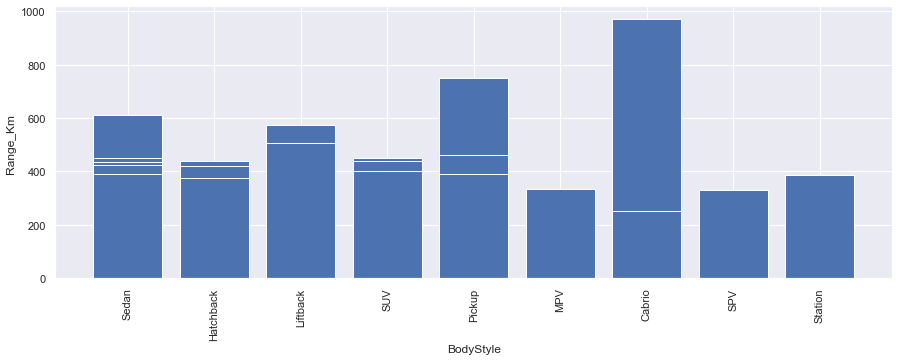

In [81]:
plt.figure(figsize=(15,5))
plt.bar(height=df2['Range_Km'],x = df2['Brand'])
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Range_Km ')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(height=df2['Range_Km'],x = df2['BodyStyle'])
plt.xticks(rotation=90)
plt.xlabel('BodyStyle')
plt.ylabel('Range_Km ')
plt.show()

- #### Tesla Brand EVs have the max range <br/>Cabrio BodyStyle EVs have max range

### 5. Efficiency

[Text(0.5, 1.0, 'Efficiency')]

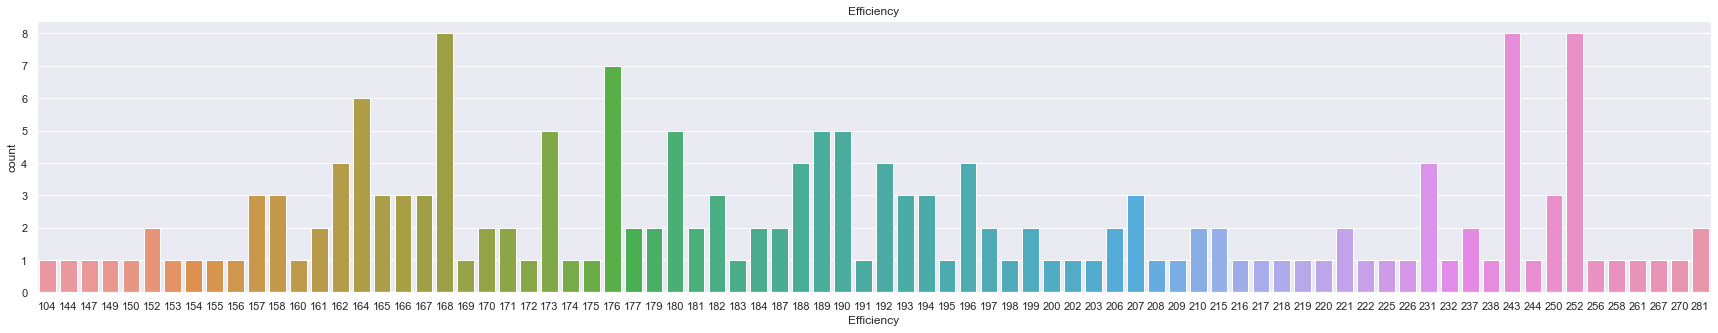

In [48]:
sns.set(rc={'figure.figsize':(30,5)})
ax = sns.countplot(x=df1['Efficiency'], data=df1)
ax.set(title='Efficiency')

In [49]:
max_eff=df1.loc[df1['Efficiency'] == 281,'Name'].values
print(max_eff)

['Mercedes EQV 300 Long' 'Mercedes EQV 300 Extra-Long']


- #### Mercedes EQV 300 Long and Mercedes EQV 300 Extra-Long have max efficiencies 

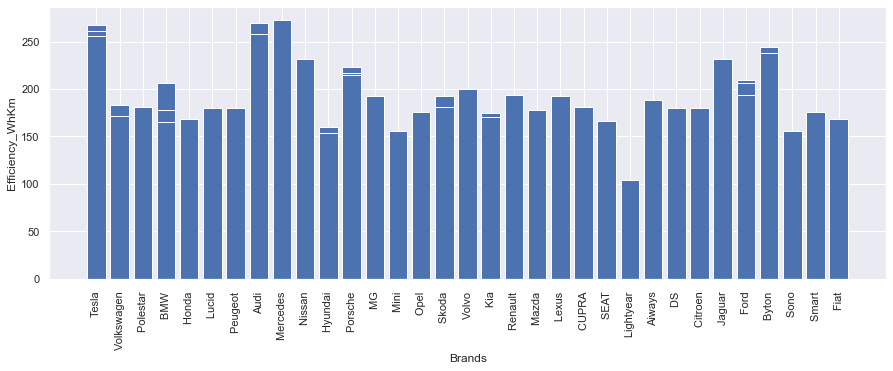

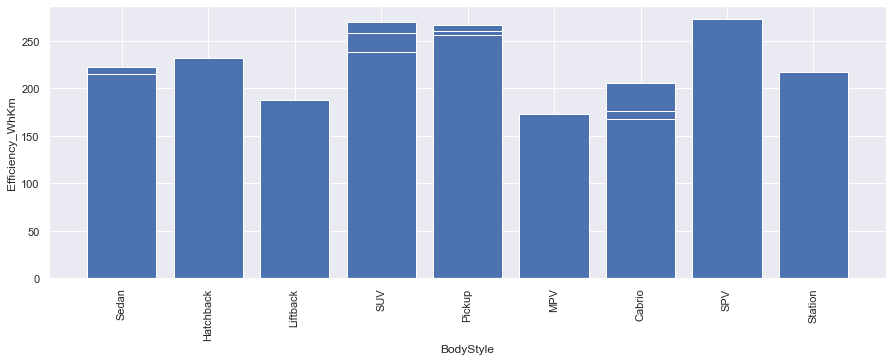

In [82]:
plt.figure(figsize=(15,5))
plt.bar(height=df2['Efficiency_WhKm'],x = df2['Brand'])
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Efficiency_WhKm')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(height=df2['Efficiency_WhKm'],x = df2['BodyStyle'])
plt.xticks(rotation=90)
plt.xlabel('BodyStyle')
plt.ylabel('Efficiency_WhKm')
plt.show()

- #### Tesla, Audi, Mercedes have max efficiencies <br/> SUV, Pickup and SPV bodystyles have max efficiencies

### 6. BodyStyle

Text(0.5, 1.0, 'BodyStyle')

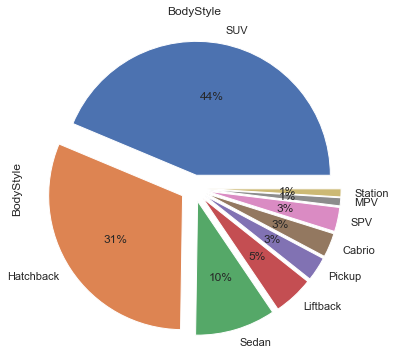

In [83]:
df2['BodyStyle'].value_counts().plot.pie(figsize=(6,12),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('BodyStyle')

- #### Max EVs are either SUVs or Hatchbacks

### 7. Charging Stations

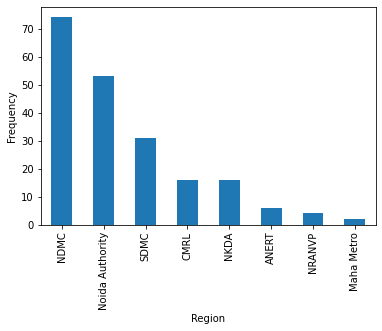

In [9]:
fig, ax = plt.subplots()
df3["region"].value_counts().plot(ax=ax, kind='bar', xlabel='Region', ylabel='Frequency')
plt.show()

- #### NDMC and Noida Authority have the most number of charging stations 

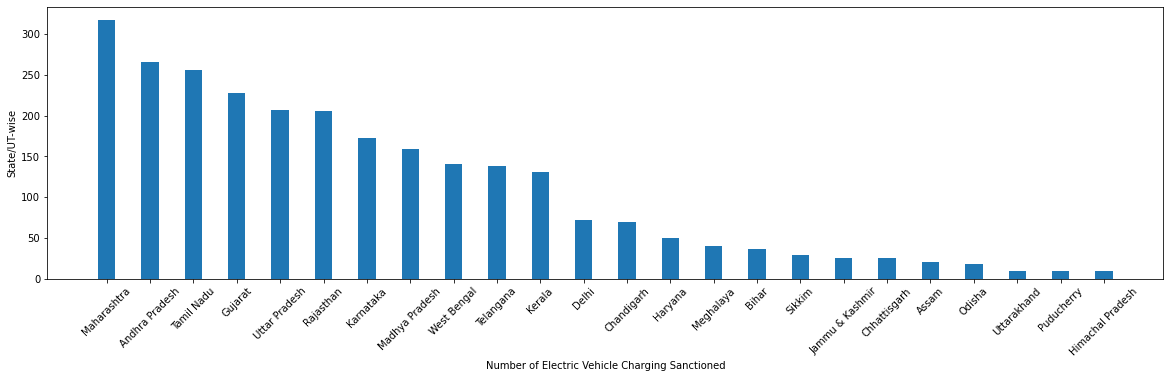

In [19]:
fig = plt.figure(figsize = (20, 5))
plt.bar(df4["State/UT-wise"], df4["Number of Electric Vehicle Charging Sanctioned"] ,width = 0.4)
plt.xlabel("Number of Electric Vehicle Charging Sanctioned")
plt.ylabel("State/UT-wise")
plt.xticks(rotation=45)
plt.show()

- #### Maharashtra, followed by Andhra Pradesh, have the highest number of Electric Vehicle Charging stations sanctioned

### 8. Price

In [61]:
dataset = pd.read_csv('ElectricCarData_Clean.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
data = dataset.drop(['Model','AccelSec','Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats'],axis = 1)

data.head()

,Brand,TopSpeed_KmH,Range_Km,PriceEuro
0,Tesla,233,450,55480
1,Volkswagen,160,270,30000
2,Polestar,210,400,56440
3,BMW,180,360,68040
4,Honda,145,170,32997


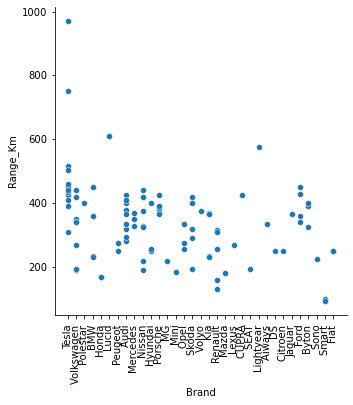

In [83]:
res = sns.relplot(x='Brand',y='Range_Km',data=data)
res = plt.xticks(rotation=90)

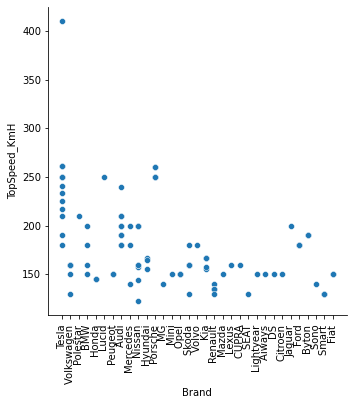

In [84]:
sns.relplot(x='Brand',y='TopSpeed_KmH',data=data)
res = plt.xticks(rotation=90)

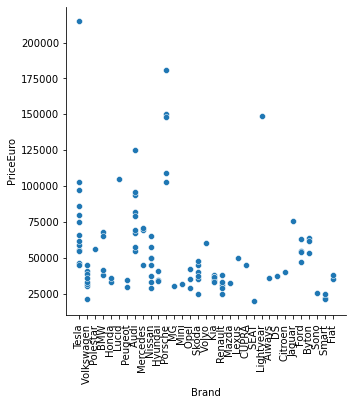

In [85]:
sns.relplot(x='Brand',y='PriceEuro',data=data)
res = plt.xticks(rotation=90)

## K-Means

### Acceleration vs top-speed

In [29]:
X = df1.iloc[:,[1,2]]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


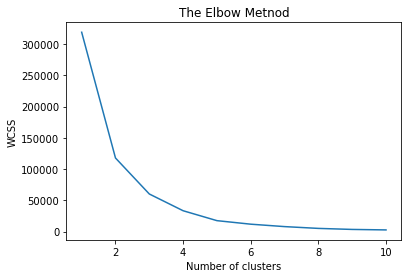

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Metnod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Number of segments = 3

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X["label"] = y_kmeans

C:\Users\DELL\AppData\Local\Temp/ipykernel_10888/3681358301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = y_kmeans


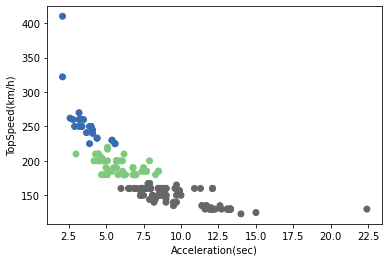

In [32]:
plt.scatter(X['Acceleration'], X['TopSpeed'], c=X["label"],cmap='Accent')
plt.xlabel('Acceleration(sec)')
plt.ylabel('TopSpeed(km/h)')
plt.show()

### Top Speed vs Range

In [34]:
X = df1.iloc[:,[2,3]]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


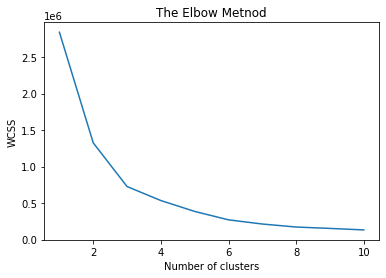

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Metnod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Number of segments = 3

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X["label"] = y_kmeans

C:\Users\DELL\AppData\Local\Temp/ipykernel_10888/3681358301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = y_kmeans


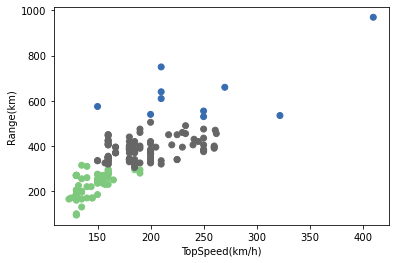

In [37]:
plt.scatter(X['TopSpeed'], X['Range'], c=X["label"],cmap='Accent')
plt.xlabel('TopSpeed(km/h)')
plt.ylabel('Range(km)')
plt.show()

### Range vs Efficiency

In [39]:
X = df1.iloc[:,[3,4]]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


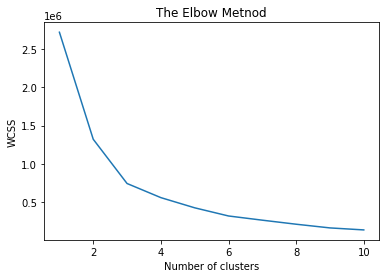

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Metnod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Number of segments = 3

In [41]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X["label"] = y_kmeans

C:\Users\DELL\AppData\Local\Temp/ipykernel_10888/3681358301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = y_kmeans


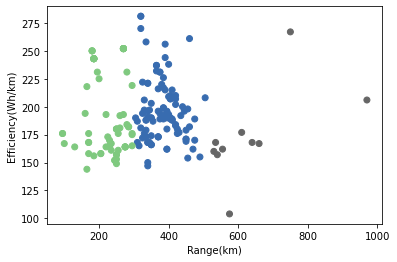

In [42]:
plt.scatter(X['Range'], X['Efficiency'], c=X["label"],cmap='Accent')
plt.xlabel('Range(km)')
plt.ylabel('Efficiency(Wh/km)')
plt.show()

### Acceleration vs Top-Speed vs Range

In [43]:
X = df1.iloc[:,[1,2,3]]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


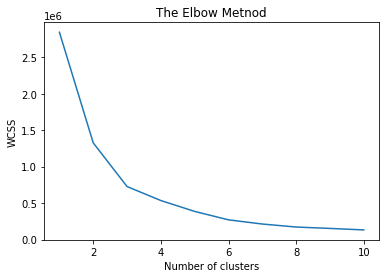

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Metnod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Number of segments = 3

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X["label"] = y_kmeans

C:\Users\DELL\AppData\Local\Temp/ipykernel_10888/3681358301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = y_kmeans


In [46]:
X.head()

,Acceleration,TopSpeed,Range,label
0,7.3,150,335,2
1,22.4,130,160,0
2,7.9,144,220,0
3,5.7,200,375,2
4,2.8,260,390,2


In [47]:
data1 = X[X.label==0]
data2 = X[X.label==1]
data3 = X[X.label==2]

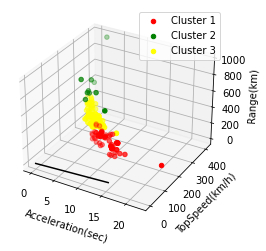

In [48]:
ax = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
ax.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
ax.scatter3D(data1.Acceleration, data1.TopSpeed, data1.Range, c='red', label = 'Cluster 1')
ax.scatter3D(data2.Acceleration, data2.TopSpeed, data2.Range,c ='green', label = 'Cluster 2')
ax.scatter3D(data3.Acceleration, data3.TopSpeed, data3.Range,c ='yellow', label = 'Cluster 3')
plt.legend()
ax.set_xlabel('Acceleration(sec)')
ax.set_ylabel('TopSpeed(km/h)')
ax.set_zlabel('Range(km)')
plt.show()

### Top-Speed vs Range vs Efficiency

In [49]:
X = df1.iloc[:,[2,3,4]]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


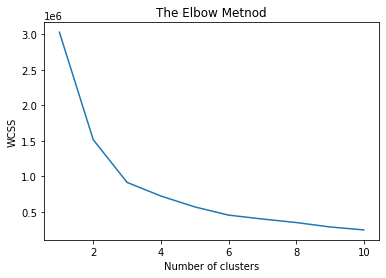

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Metnod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Number of segments = 3

In [51]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X["label"] = y_kmeans

C:\Users\DELL\AppData\Local\Temp/ipykernel_10888/3681358301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = y_kmeans


In [52]:
X.head()

,TopSpeed,Range,Efficiency,label
0,150,335,173,1
1,130,160,194,0
2,144,220,164,0
3,200,375,231,1
4,260,390,215,1


In [53]:
data1 = X[X.label==0]
data2 = X[X.label==1]
data3 = X[X.label==2]

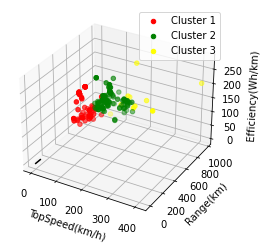

In [54]:
ax = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
ax.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
ax.scatter3D(data1.TopSpeed, data1.Range, data1.Efficiency, c='red', label = 'Cluster 1')
ax.scatter3D(data2.TopSpeed, data2.Range, data2.Efficiency, c ='green', label = 'Cluster 2')
ax.scatter3D(data3.TopSpeed, data3.Range, data3.Efficiency, c ='yellow', label = 'Cluster 3')
plt.legend()
ax.set_xlabel('TopSpeed(km/h)')
ax.set_ylabel('Range(km)')
ax.set_zlabel('Efficiency(Wh/km)')
plt.show()